**輸出tensoflow的版本並切換成1.x版本**

TensorFlow 1.x selected.
1.15.2


輸出keras的版本

Using TensorFlow backend.


'2.2.5'

# Overfitting and underfitting

載入IMDB資料集並處理

In [0]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


# Fighting overfitting
## 方法一 收集更多資料
## 方法二 Reducing the network's size

建立神經網路(16個神經元)

In [0]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


使用較小的神經網路(4個神經元)

In [0]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

In [0]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))




Train on 25000 samples, validate on 25000 samples
Epoch 1/20





25000/25000 [==============================] - 3s 135us/step - loss: 0.4637 - acc: 0.8080 - val_loss: 0.3747 - val_acc: 0.8535
Epoch 2/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.2639 - acc: 0.9095 - val_loss: 0.2881 - val_acc: 0.8875
Epoch 3/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.2022 - acc: 0.9280 - val_loss: 0.2821 - val_acc: 0.8884
Epoch 4/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.1676 - acc: 0.9416 - val_loss: 0.2918 - val_acc: 0.8839
Epoch 5/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.1396 - acc: 0.9516 - val_loss: 0.3126 - val_acc: 0.8796
Epoch 6/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.1225 - acc: 0.9586 - val_loss: 0.3296 - val_acc: 0.8763
Epoch 7/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.1046 - acc: 0.9658 - val_loss: 0

In [0]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.6380 - acc: 0.6759 - val_loss: 0.6015 - val_acc: 0.7524
Epoch 2/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.5588 - acc: 0.7980 - val_loss: 0.5441 - val_acc: 0.7965
Epoch 3/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.4999 - acc: 0.8478 - val_loss: 0.4986 - val_acc: 0.8374
Epoch 4/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.4498 - acc: 0.8784 - val_loss: 0.4578 - val_acc: 0.8660
Epoch 5/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.3970 - acc: 0.9038 - val_loss: 0.4067 - val_acc: 0.8806
Epoch 6/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.3275 - acc: 0.9217 - val_loss: 0.3469 - val_acc: 0.8864
Epoch 7/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.2601 - acc: 0.9304 - val_loss: 0.3059 - v

原始的loss及較小神經網路的loss

In [0]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

畫圖

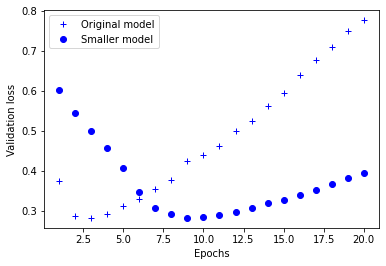

In [0]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


使用較大的神經網路(512個神經元)

In [0]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [0]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 18s 705us/step - loss: 0.4655 - acc: 0.7980 - val_loss: 0.3294 - val_acc: 0.8616
Epoch 2/20
25000/25000 [==============================] - 17s 690us/step - loss: 0.2227 - acc: 0.9119 - val_loss: 0.2857 - val_acc: 0.8844
Epoch 3/20
25000/25000 [==============================] - 17s 688us/step - loss: 0.1259 - acc: 0.9532 - val_loss: 0.3880 - val_acc: 0.8764
Epoch 4/20
25000/25000 [==============================] - 17s 690us/step - loss: 0.0680 - acc: 0.9787 - val_loss: 0.3891 - val_acc: 0.8819
Epoch 5/20
25000/25000 [==============================] - 17s 688us/step - loss: 0.0588 - acc: 0.9880 - val_loss: 0.4924 - val_acc: 0.8809
Epoch 6/20
25000/25000 [==============================] - 17s 692us/step - loss: 0.0377 - acc: 0.9945 - val_loss: 2.6765 - val_acc: 0.6830
Epoch 7/20
25000/25000 [==============================] - 17s 689us/step - loss: 0.0345 - acc: 0.9947 - val_loss: 0.

原始的loss及較大神經網路的loss, 畫圖

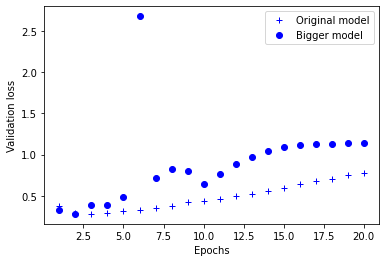

In [0]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The bigger network starts overfitting almost right away, after just one epoch, and overfits much more severely. Its validation loss is also 
more noisy.

Meanwhile, here are the training losses for our two networks:

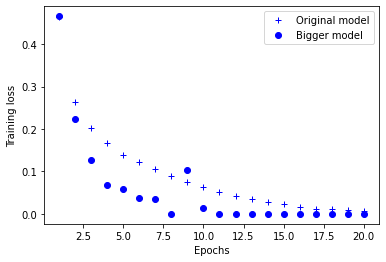

In [0]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## 方法三 Adding weight regularization
* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the 
"L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called 
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different 
name confuse you: weight decay is mathematically the exact same as L2 regularization.

使用L2 regularization(0.001)

In [0]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [0]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.4766 - acc: 0.8188 - val_loss: 0.3793 - val_acc: 0.8773
Epoch 2/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.3069 - acc: 0.9057 - val_loss: 0.3341 - val_acc: 0.8876
Epoch 3/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.2619 - acc: 0.9198 - val_loss: 0.3332 - val_acc: 0.8873
Epoch 4/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.2443 - acc: 0.9299 - val_loss: 0.3404 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.2321 - acc: 0.9345 - val_loss: 0.3672 - val_acc: 0.8741
Epoch 6/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.2260 - acc: 0.9372 - val_loss: 0.3525 - val_acc: 0.8809
Epoch 7/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.2190 - acc: 0.9405 - val_loss: 0.3808 - 

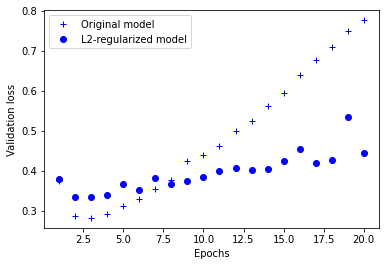

In [0]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()



As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), 
even though both models have the same number of parameters.

As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [0]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## 方法四 Adding dropout
抽掉50%的神經元

In [0]:
# At training time: we drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)


At test time, we would be scaling the output down by the dropout rate. Here we scale by 0.5 (because we were previous dropping half the 
units):

In [0]:
# At test time:
layer_output *= 0.5


Note that this process can be implemented by doing both operations at training time and leaving the output unchanged at test time, which is 
often the way it is implemented in practice:

In [0]:
# At training time:
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5

In [0]:
model.add(layers.Dropout(0.5))

在IMDB的神經網路上加入兩個Dropout成去減少overfitting

In [0]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 245us/step - loss: 0.6015 - acc: 0.6758 - val_loss: 0.4606 - val_acc: 0.8625
Epoch 2/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.4531 - acc: 0.8170 - val_loss: 0.3595 - val_acc: 0.8807
Epoch 3/20
25000/25000 [==============================] - 3s 110us/step - loss: 0.3716 - acc: 0.8730 - val_loss: 0.3123 - val_acc: 0.8890
Epoch 4/20
25000/25000 [==============================] - 3s 110us/step - loss: 0.3134 - acc: 0.8969 - val_loss: 0.2929 - val_acc: 0.8841
Epoch 5/20
25000/25000 [==============================] - 3s 110us/step - loss: 0.2757 - acc: 0.9132 - val_loss: 0.2856 - val_acc: 0.8870
Epoch 6/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2440 - acc: 0.9236 - val_loss: 0.2922 - val_acc: 0.8877
Epoch 7/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2206 - acc: 0.9319 - val_loss: 0.3058 - 

畫圖

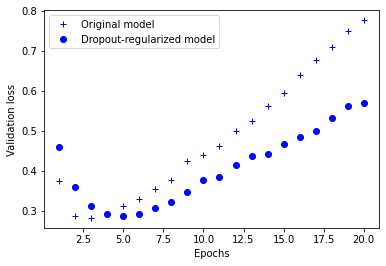

In [0]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.